In [1]:
import os
os.chdir('..')

from src.load_model import model
import pandas as pd
import numpy as np

/home/timo/rep/TextClassifier/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
splits = {'train': 'train.jsonl', 'test': 'test.jsonl'}
test = pd.read_json("hf://datasets/AlexSham/Toxic_Russian_Comments/" + splits["test"], lines=True)
test

,text,label
0,хорошо пошло!,0
1,"посмотрела, как будто дома побывала. как река ...",0
2,"отдам котят 1,5 месяца в добрые руки.",0
3,"0,5литровая баночка 200р стоит в таганроге. та...",0
4,речь шла о радужных зонтиках над верандой.,0
...,...,...
24824,и ты будь здоров,0
24825,не дорога а прям стекло но правда битое (h),0
24826,спасибо большое. буду ждать хороших новостей. ...,0
24827,активирую установку 🌈🌈🌈👍😎🔥🔥🔥,0


In [3]:
from tqdm import tqdm

# Размер батча
batch_size = 256

test['pred'] = [
    model(text).item()
    for batch in tqdm(range(0, len(test), batch_size))
    for text in test['text'][batch:batch + batch_size]
]

100%|██████████| 97/97 [00:39<00:00,  2.44it/s]


In [4]:
from sklearn.metrics import classification_report

threshold = 0.5

pred = test['pred'].apply(lambda x: 1 if x >= threshold else 0)

# Вычисление основных метрик
class_report = classification_report(test['label'], pred, target_names=['non-toxic', 'toxic'])

print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

   non-toxic       0.99      0.98      0.98     20369
       toxic       0.92      0.94      0.93      4460

    accuracy                           0.98     24829
   macro avg       0.96      0.96      0.96     24829
weighted avg       0.98      0.98      0.98     24829



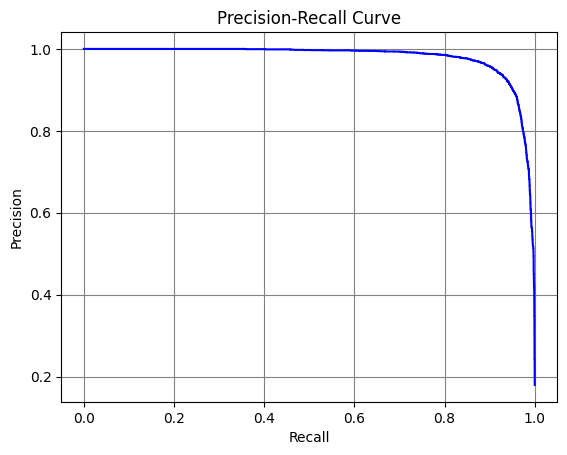

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Предсказания модели: вероятности для положительного класса
y_probs = test['pred']

# Истинные метки
y_true = test['label']

# Вычисление Precision-Recall кривой для разных порогов
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

# Построение Precision-Recall кривой
plt.plot(recall, precision, 
         color='blue',)
plt.grid(
    color='gray',
)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [6]:
def get_thresholds(thresholds_precision):
    return thresholds[np.where(precision>=thresholds_precision)[0][0]].item()

get_thresholds(0.95)

0.7482494115829468

In [7]:
threshold = 0.75

pred = test['pred'].apply(lambda x: 1 if x >= threshold else 0)

# Вычисление основных метрик
class_report = classification_report(test['label'], pred, target_names=['non-toxic', 'toxic'])

print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

   non-toxic       0.98      0.99      0.99     20369
       toxic       0.95      0.91      0.93      4460

    accuracy                           0.98     24829
   macro avg       0.97      0.95      0.96     24829
weighted avg       0.98      0.98      0.98     24829

